In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100, 1)
y = 7 + 2 * X + np.random.rand(100, 1)

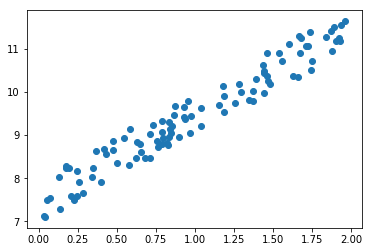

In [3]:
plt.scatter(X, y)

In [4]:
## Normal Equation

In [5]:
X_b = np.c_[np.ones(X.shape), X]
# theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
# theta_best

$P_{r,c} = \sum_{k=1}^n{Q_{r,k} \times R_{k,c}}$

where;

$P$ = dot

$Q$ = X_b.T

$R$ = X_b

In [7]:
dot = np.zeros((X_b.T.shape[0], X_b.shape[1]))

for r in range(dot.shape[0]):
    for c in range(dot.shape[1]):
        sm = 0
        for k in range(X_b.shape[0]):
            sm += X_b.T[r,k] * X_b[k,c]
        dot[r, c] = sm


In [8]:
invd = np.linalg.inv(dot)

dot2 = np.zeros((invd.shape[0], X_b.T.shape[1]))

for r in range(dot2.shape[0]):
    for c in range(dot2.shape[1]):
        sm = 0
        for k in range(X_b.T.shape[0]):
            sm += invd[r,k] * X_b.T[k,c]
        dot2[r, c] = sm

theta_best = np.zeros((dot2.shape[0], y.shape[1]))

for r in range(theta_best.shape[0]):
    for c in range(theta_best.shape[1]):
        sm = 0
        for k in range(y.shape[0]):
            sm += dot2[r,k] * y[k,c]
        theta_best[r, c] = sm
        
theta_best

array([[ 7.42593551],
       [ 2.04303812]])

In [48]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

# y_pred = X_new_b @ theta_best

y_pred = np.zeros((X_new_b.shape[0], theta_best.shape[1]))

for r in range(y_pred.shape[0]):
    for c in range(y_pred.shape[1]):
        sm = 0
        for k in range(theta_best.shape[0]):
            sm += X_new_b[r,k] * theta_best[k,c]
        y_pred[r, c] = sm

y_pred

array([[  7.42788844],
       [ 11.52305379]])

In [38]:
norm_pred = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

(np.linalg.inv(X_b.T @ X_b) @ X_b.T) @ y

array([[ 7.42593551],
       [ 2.04303812]])

$X = X_b.T @ X_b = \begin{bmatrix} 100 & 98.85\\  98.85 & 129.09 \end{bmatrix}$

$XA = X^{-1} = \begin{bmatrix} 0.04116289 & -0.03152281\\  -0.03152281 & 0.03188688 \end{bmatrix}$

$XB = XA @ X_b.T @ y = \begin{bmatrix} 7.42593551\\ 2.04303812 \end{bmatrix}$

In [15]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()

m.fit(X, y)

print('weights: ')
print(m.coef_)
print('Intercept: ')
print(m.intercept_)

weights: 
[[ 2.04303812]]
Intercept: 
[ 7.42593551]


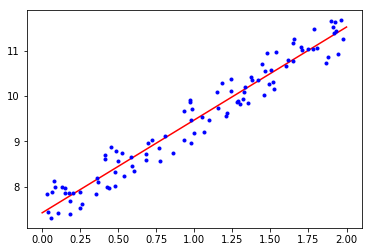

In [49]:
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.show()

## Batch Gradient Descent

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

In [51]:
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [ ]:
eta = 0.1
n_iter = 1000
m = 100

theta = np.random.randn(2,1)

for i in range(n_iter):
    gradients = 2/m * X_b.T @ ((X_b @ theta) - y)
    theta = theta - eta * gradients
    
theta

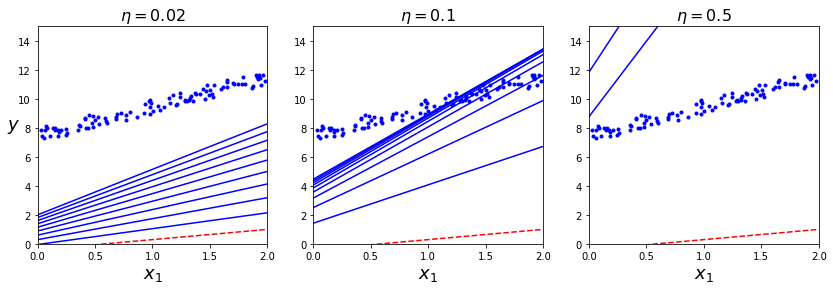

In [53]:
theta_path_bgd = []

np.random.seed(29)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(14,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [54]:
## Stochastic Gradient Descent

In [74]:
n_epoch = 50
m = len(X_b)
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):
    for i in range(m):
        randi = np.random.randint(m)
        xi = X_b[randi:randi+1]
        yi = y[randi:randi+1]
        gradients = xi.T @ ((xi @ theta) - yi) # what is this calculation?
#         print(gradients)
#         gradients = (xi @ theta) - yi
#         print(f'grad: {gradients}')
#         print(f'yi:   {yi}')
#         print(f'pred: {xi @ theta}')
#         print(f'diff: {yi - (xi @ theta)}\n')
        eta = learning_schedule(epoch * m + i)
#         print(f'{theta} - {eta} * {gradients}\n')
        theta = theta - eta * gradients

theta

def BGD(X, y, eta, n_epoch):
    theta = np.random.rand(X.shape[1], 1)
    m = len(X)
    for i in range(n_epoch):
        gradients = 2/m * (X.T @ ((X @ theta) - y))
        theta = theta - eta * gradients
    print(theta.shape)
    return np.mean(theta, axis=1).reshape(X.shape[1], 1)

def SGD(X, y, eta, n_epoch):
    theta = np.random.rand(X.shape[1], 1)
    m = X.shape[0]
    for epoch in range(n_epoch):
        for i in range(m):
            ri = np.random.randint(m)
            guess = X[ri:ri+1] @ theta
            diff = guess - y[ri:ri+1]
            grad = X[ri:ri+1].T @ diff
            theta = theta - grad * eta
#     print(X[ri:ri+1].T)
#     print(diff)
#     print(grad)
    print(theta)
    
BGD(np.c_[np.ones((X.shape[0], 1)), X], y, 0.1, 100)



(2, 1)


array([[ 7.26771064],
       [ 2.17968652]])

In [59]:
X_new = np.array([[2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]

y_pred = X_new_b @ theta

y_pred # the sum of x_new_b[0] * theta[0,0] * theta[1,0]

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

for r in range(pred.shape[0]):
    for c in range(pred.shape[1]):
        sm = 0
        for k in range(theta.shape[0]):
            sm += X_new_b[r,k] * theta[k,c]
        pred[r, c] = sm

pred

array([[ 11.58758767]])

In [60]:
print(X_new_b)

pred = np.zeros((X_new_b.shape[0], theta.shape[1]))

print(pred)

pred[0,0] = X_new_b[0,0] * theta[0,0] + X_new_b[0,1] *theta[1,0]

print(f'{theta}\n')

print(f'Prediction = {X_new_b[0,0]} x {theta[0,0]} + {X_new_b[0,1]} * {theta[1,0]}')

pred

[[ 1.  2.]]
[[ 0.]]
[[ 7.33095307]
 [ 2.1283173 ]]

Prediction = 1.0 x 7.330953069696836 + 2.0 * 2.128317298072203


array([[ 11.58758767]])

$y = a+bX$

where:

$a$ = 7.362627012002335 = theta[0,0]

$b$ = 2.106024281546152 = theta[1,0]

In [86]:
xi = X_b[10:11]
yi = X_b[10:11]
eta = 0.01

theta = np.random.randn(2,1)

print('xi transposed')
print(xi.T)
print('\n')

print('xi')
print(xi)
print('\n')

print('theta')
print(theta)
print('\n')

print('xi @ theta: this is the prediction using the current theta')
print(xi @ theta)
print('\n')

print('xi.T @ (xi @ theta)')
print(xi.T @ (xi @ theta))
print('\n')

print('yi')
print(yi)
print('\n')

gradients = xi.T @ ((xi @ theta) - yi)

print('gradients = xi.T @ ((xi @ theta) - yi): this is the difference of predicted to actual')
print(xi.T @ ((xi @ theta) - yi))
print('\n')

print('eta * gradients: this is the scalar to multiplied by the differece')
print(eta * gradients)
print('\n')

print('theta = theta - eta * gradients: this is the new theta')
print(theta - eta * gradients)


xi transposed
[[ 1.        ]
 [ 1.32666913]]


xi
[[ 1.          1.32666913]]


theta
[[ 0.08115615]
 [-0.0101643 ]]


xi @ theta: this is the prediction using the current theta
[[ 0.06767149]]


xi.T @ (xi @ theta)
[[ 0.06767149]
 [ 0.08977768]]


yi
[[ 1.          1.32666913]]


gradients = xi.T @ ((xi @ theta) - yi): this is the difference of predicted to actual
[[-0.93232851 -1.25899764]
 [-1.23689145 -1.67027331]]


eta * gradients: this is the scalar to multiplied by the differece
[[-0.00932329 -0.01258998]
 [-0.01236891 -0.01670273]]


theta = theta - eta * gradients: this is the new theta
[[ 0.09047944  0.09374613]
 [ 0.00220462  0.00653844]]
